# Task 1. Linear Regression

In [2]:
# importing necessary libraries 
import numpy as np
import matplotlib.pyplot as plt

Then we should create a function generating random 100 points, so that we'll be able to run Pocket and Linear Regression algortihms to get the weights.

In [3]:
def data_set(size):
  d = 2
  # initializing  with proper sizes 
  x = np.random.uniform(-1,1,(size,d))*10
  w = np.random.randint(1,10,d)
  b = np.random.randint(1,10)
  y = np.zeros(20)

  h = x.dot(w) + b
  sign = 1*(h>0)
  ran = np.random.randint(size,size=10)

  for i in ran:
    if sign[i] == 1:
      sign[i] = 0
    else:
      sign[i] = 1
  y = sign

  return x,y,w,b

In order to test the performance of both algorithms, we find the errors, which is a minimization square root error:

In [4]:
def error(x,y,w):
  err = 0

  for j in range(len(x)):
    y_prev = np.dot(x[j],w)
    if (y_prev <= 0 and y[j] == 1):
      err += 1
    elif (y_prev > 0 and y[j] == -1):
      err += 1

  n = x.size
  err_r = err/n
  
  return err_r

In [5]:
def pocket_alg(x, y, w, max_iter):
  e = []
  new = 0
  upd_n = []
  er = 0

  for i in range(max_iter):
    # created lists to save information about predicted and wrong y's
    y_predict = []
    y_wrong = []

    for j in range(len(x)):
      if np.dot(x[j],w)>0:
        y_predict.append(1)
      else:
        y_predict.append(0)
      if y_predict[j] != y[j]:
        y_wrong.append(j)

    ran_wrong = np.random.randint(len(y_wrong))
    upd_weight = w + (y[ran_wrong]*y_predict[ran_wrong])*x[ran_wrong]
    # after choosing one of the wrong, updated the weight
    E_old = error(x,y,w)
    E_new = error(x,y,upd_weight)

    if E_old > E_new:
      # in case of the new error being less than the old one, we updated the weights
      e.append(E_new)
      upd_n.append(new)
      w = np.copy(upd_weight)
      new += 1
      er = E_new

  return w


In [6]:
def linear_regression(x,y):
  yn = y.reshape(len(y),1)
  inv_mat = np.linalg.inv(np.dot(x.T,x))
  x_inv = np.dot(inv_mat,x.T)
  w_lin = np.dot(x_inv,yn)
  return w_lin

In [7]:
# 1 sub-task: starting from data set generation of 100 randoms
x_tr, y_tr, x_test, y_test = data_set(100)

In [8]:
# 2 sub-task: running pocket algorith on the training set of 1000
T = 1000
w = np.zeros(2)
w_pocket = pocket_alg(x_tr,y_tr,w,T)

In [9]:
# 3 sub-task: running the linear regression algorithm to get w_lin
w_lin = linear_regression(x_tr, y_tr)
w_lin

array([[0.0238632 ],
       [0.05555303]])

In [10]:
# 3 sub-task estimating the performance to get E_pocket
x_test1, y_test1, w_test1, b_test1 = data_set(1000)

E_pocket=error(x_test1, y_test1, w_pocket)
E_pocket

0.2835

In [11]:
# 3 sub-task estimating the performance to get E_lin
E_lin = error(x_test1, y_test1, w_lin)
E_lin

0.0565

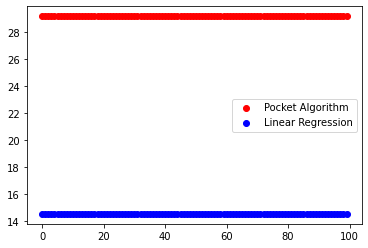

In [12]:
x_fresh, y_fresh, w_fresh, b_fresh = data_set(1000)

# 4 sub-task repeating the experiment with fresh data sets
E_lin_fresh= np.zeros(100)
E_pocket_fresh= np.zeros(100)
n = np.zeros(100)
w_new = np.zeros(3)

for i in range (100):
    
    E_pocket_fresh[i]=error(x_fresh, y_fresh, w_pocket)
    E_lin_fresh[i]=error(x_fresh, y_test1, w_lin)
    
    n[i]=i

# plotting versus graph as a scatter plot
plt.scatter(n, E_pocket_fresh*100, label = 'Pocket Algorithm', color = 'red')
plt.scatter(n, E_lin_fresh*100, label = "Linear Regression", color = 'blue')
plt.legend()
plt.show()

Although both algorithms gave us small errors, here we can observe that Pocket algorithm is better than Linear regression algorithm; however, Linear regression is faster than Pocket. 

# Task 2. Logistic regression

First we import all necessary libraries

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import random

The next step is to import our iris dataset to train our logistic regression and find in and out errors of our algorithm.

In [ ]:
iris = load_iris()

Then we split our data to train and test samples

In [ ]:
x, y = iris.data, iris.target
    
train = random.sample(range(0,150),int(0.8*x.shape[0]))
test = list(set(range(0,150))-set(train))# by substraction operation on sets of values we leave 20% of data to test

x_train, y_train, x_test, y_test = x[train], y[train], x[test], y[test]

In [ ]:
int(0.8*x.shape[0])

120

Value of the above expression is 120, that is for train data. It follows that we have 30 rows for testing

In [ ]:
def log_reg(x_train, x_test, y_train, y_test):
    train_samp, d = x_train.shape #set train sample size to 120 with d = 4
    test_samp = x_test.shape[0] #set test sample size to 30

    train = random.sample(range(0,120),120)#randomize sample for training with 80% of data
    test = random.sample(range(0,30),30) #randomize sample for testing with 30% of data

    T, lr = 2000, 0.0001# set number of iterations to 2000 and learning rate to 0.0001

    w = np.zeros(d+1) #initialize w(0) with all zeros

    E_in= [] #initialize list
    E_test = [] #initialize list

    #iterate 2000 times
    for iteration in range(T):
        error_samp, error_tests = 0, 0 #set train and test errors to 0 at the beginning of each iteration

        for i in train:
            ex_train = np.append(x_train[i], 1) #append row to train
            w += lr * np.log(1+np.exp(-y_train[i]*2*np.dot(w.T, ex_train))) #update weight
            error_samp += np.log(1+np.exp(-y_train[i]*2*np.dot(w.T, ex_train))) #find cross entropy error
        E_in.append(error_samp / train_samp) #append average value to in error

        for i in test:
            ex_test = np.append(x_test[i],1) #append row to test
            error_tests += np.log(1+np.exp(-y_test[i]*2*np.dot(w.T, ex_test))) #find cross entropy error
        E_test.append(error_tests / test_samp) #append average value to test error
    
    return error_tests / test_samp


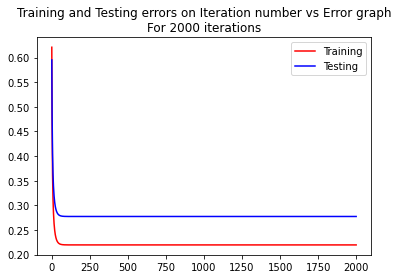

In [ ]:
plt.plot(range(T), E_in, label='Training', color= 'red')
plt.plot(range(T), E_test, label='Testing', color= 'blue')
plt.title("Training and Testing errors on Iteration number vs Error graph\nFor 2000 iterations", loc = 'center')
plt.legend(loc = 0)
plt.show()

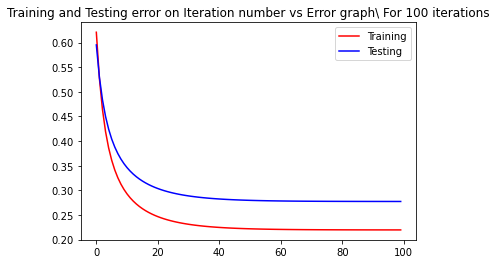

In [ ]:
plt.plot(range(100), E_in[:100], label='Training', color= 'red')
plt.plot(range(100), E_test[:100], label='Testing', color= 'blue')
plt.title("Training and Testing error on Iteration number vs Error graph\ For 100 iterations", loc = 'center')
plt.legend(loc = 0)
plt.show()

After the training of the model, we have plotted a graph with the training and testing error's value of each iteration. We see that our function performs equally on a small number of iterations but better on larger values.

We were interested in a clearer picture of error values at the small number of iterations. That is why we have plotted values up to 100. On first iterations, our regression even performs better on testing data, but after some value approximately close to 5, the testing error is higher than training one, this continues to be seen, and on values greater than 100

# <center>Task 3. Practical design of a learning algorithm

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import random

In [ ]:
linreg_model = LinearRegression()
logreg_model = LogisticRegression()


**Load Optical Recognition of Handwritten Digits Data Set**

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()


In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
n_samples, n_features = digits.data.shape


In [ ]:
np.bincount(digits.target)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

In [ ]:
X = digits.data
y = digits.target

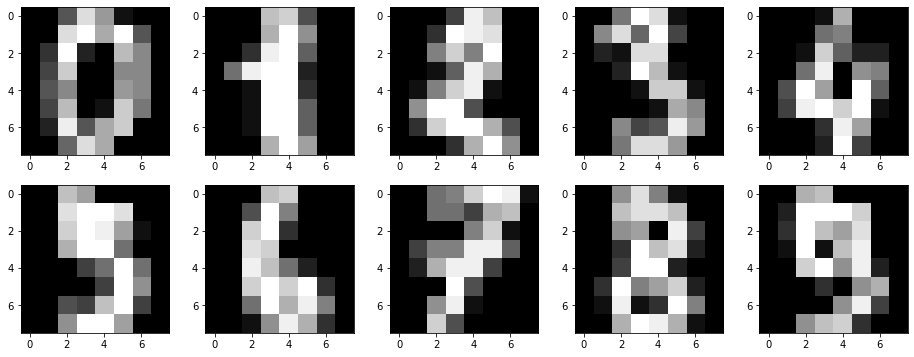

In [ ]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray');

**Using the Linear & Logistic Regression coded in Section 1 and 2 implement a routine that uses tenfold cross validation for model selection on digits dataset.**

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

To avoid the problem where one fold would have only one class to recognize, we would shuffle our data

In [ ]:
import numpy as np
rng = np.random.RandomState(0)

permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
print(y)

[2 2 3 ... 0 6 6]


For the following step, we would implement cross-validation, but first of all we will impelement our Linear/Logistic Regression models.


In [ ]:
def linear_regression(x,y):
    yn = y.reshape(len(y), 1)
    inv_mat = np.linalg.pinv(np.dot(x.T, x))
    x_inv = np.dot(inv_mat, x.T)
    w_lin = np.dot(x_inv, yn)
    return w_lin

In [ ]:
def log_reg(x_train, y_train, x_test, y_test):
    train_samp, d = x_train.shape #set train sample size to 120 with d = 4
    test_samp = x_test.shape[0] #set test sample size to 30

    train = random.sample(range(0,120),120)#randomize sample for training with 80% of data
    test = random.sample(range(0,30),30) #randomize sample for testing with 30% of data

    T, lr = 50, 0.0001# set number of iterations to 50 and learning rate to 0.0001

    w = np.zeros(d+1) #initialize w(0) with all zeros

    E_in= [] #initialize list
    E_test = [] #initialize list

    #iterate 2000 times
    for iteration in range(T):
        error_samp, error_tests = 0, 0 #set train and test errors to 0 at the beginning of each iteration
        for i in train:
            ex_train = np.append(x_train[i], 1) #append row to train
            w += lr * np.log(1+np.exp(-y_train[i]*2*np.dot(w.T, ex_train))) #update weight
            error_samp += np.log(1+np.exp(-y_train[i]*2*np.dot(w.T, ex_train))) #find cross entropy error
        E_in.append(error_samp / train_samp) #append average value to in error

        for i in test:
            ex_test = np.append(x_test[i],1) #append row to test
            error_tests += np.log(1+np.exp(-y_test[i]*2*np.dot(w.T, ex_test))) #find cross entropy error
        E_test.append(error_tests / test_samp) #append average value to test error
            
    
    return error_tests / test_samp
    
    

We would create Xnew matrix, where will be added new column consisting from ones i.e intercept of a linear function.

In [ ]:
n,m = X.shape
X0 = np.ones((n,1))
Xnew = np.hstack((X0, X))

In [ ]:
w = linear_regression(Xnew,y)
y_pred = np.dot(Xnew, w)
MSE = np.square(np.subtract(y_pred,y.reshape(len(y), 1))).mean()
MSE

3.2956107093706577

Checking the error approximation by repeating the same process by Scikit-learn package

In [ ]:
linreg_model.fit(Xnew, y)
y_pred_skl = linreg_model.predict(Xnew)
MSE_skl = np.square(np.subtract(y_pred_skl,y)).mean()
MSE_skl

3.2956107093706577

In [ ]:
def cross_val_linreg(X, y, n_folds):
    
    n_samples = len(X)
    fold_size = n_samples // n_folds
    errors = []
    
    for fold in range(n_folds):
        
        test_mask = np.zeros(n_samples, dtype=bool)
        test_mask[fold * fold_size : (fold + 1) * fold_size] = True
        X_test, y_test = X[test_mask], y[test_mask]
        X_train, y_train = X[~test_mask], y[~test_mask]
    
        w = linear_regression(X_train, y_train)
        y_test = y_test.reshape(len(y_test), 1)
        
    # compute the Mean Squared Error and record it
        y_pred = np.dot(X_test, w)
        MSE = np.square(np.subtract(y_pred,y_test)).mean()
        errors.append(MSE)
        
    return np.mean(errors)
    

In [ ]:
def cross_val_logreg(X, y, n_folds):
    
    n_samples = len(X)
    fold_size = n_samples // n_folds
    errors = []
    
    for fold in range(n_folds):
        
        test_mask = np.zeros(n_samples, dtype=bool)
        test_mask[fold * fold_size : (fold + 1) * fold_size] = True
    
        X_test, y_test = X[test_mask], y[test_mask]
        X_train, y_train = X[~test_mask], y[~test_mask]
        
        errors.append(log_reg(X_train, y_train, X_test, y_test))
        
    return np.mean(errors)

In [ ]:
d = {'n_folds = 5 ': [cross_val_linreg(Xnew, y, 5), cross_val_logreg(X, y, 5)] ,
     'n_folds = 10': [cross_val_linreg(Xnew, y, 10), cross_val_logreg(X, y, 10)],
     'n_folds = 20': [cross_val_linreg(Xnew, y, 20), cross_val_logreg(X, y, 20)],
     'n_folds = loocv': [cross_val_linreg(Xnew, y, len(X)), np.nan]}

In [ ]:
df = pd.DataFrame(d)

In [ ]:
df['model'] = ['Linear Regression', 'Logistic Regression']

In [ ]:
df.set_index('model', inplace = True)

In [ ]:
df

,n_folds = 5,n_folds = 10,n_folds = 20,n_folds = loocv
model,,,,
Linear Regression,3.577716,3.556134,3.542497,3.528578
Logistic Regression,0.005020,0.008906,0.017913,NaN


**The main problem that I failed to solve was making a leave-one-out cross-validation with Logistic Regression, as it requires too much computational power and our algorithm was not optimized properly for the “loocv”.**

**Generalization Error**

Linear Regression-> We used MSE metrics

Logistic Regression-> We used cross-entropy error

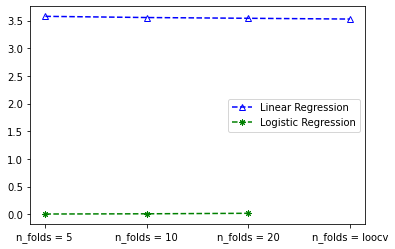

In [ ]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(df.loc['Linear Regression'],c='b',marker="^",ls='--',label='Linear Regression',fillstyle='none')
ax.plot(df.loc['Logistic Regression'],c='g',marker=(8,2,0),ls='--',label='Logistic Regression')


plt.legend(loc='best')
plt.draw()

Here, we can see that changing the number of folds in cross-validation in the preiod of [5 ,20] does not affect the generalization error measure of both models. So it is better for us to use just use 5-fold cv, because the higher number of folds for cross-validation requires more computation power. Overall, we can see that Logistic Regression has significantly better accuracy than Linear Regression at classifying the digits dataset.

The appliance of Linear Regression to multiclass classification sacrifices the principled and probabilistic way which is used in multinomial logistic regression. It also can be said that the squared error is an odd choice for classification problems, where we're predicting binary values. The problem is that the squared error penalizes large outputs{0,1,2,3,4,5,6,7,8,9}, even when these ought to be considered correct.

**Perform GridSearchCV based tenfold cross-validation using the Scikit-learn module and compare the performance of Linear and Logistic regression on digits dataset**

**For each model, plot the validation curves using Scikit-Learn to justify your selection of a final model. Explain how you addressed the bias-variance tradeoff and that your model has not overfitted the digits dataset.**

### <center> GridSearchCV implementation with Linear Regression (using Lasso and Ridge regularization techniques).

To remedy overtting, we will decrease the model complexity by implementing Regularizations techniques.That will be done via Scikit-Learn GridSearchCV() function, where we will tune the alpha hyperparameter.The GridSearchCV will be based on tenfold cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso, Ridge

**Case - 1: Lasso Regression**

Lasso(Least Absolute Shrinkage and Selection Operator) can pick relevant features that will be useful for modelling. Lasso also has the shrinkage parametre but the difference that has with Ridge is that there is no squared term of the estimated coefficient but only an absolute value. Hence, much like best subset selection, the lasso performs feature selection.

In [ ]:
grid_linreg_l1 = GridSearchCV(Lasso(),param_grid = {'alpha': np.logspace(-7, 3, 3)}, cv=10)
grid_linreg_l1.fit(X, y)
grid_linreg_l1.best_params_, grid_linreg_l1.best_score_

({'alpha': 0.01}, 0.5661778295170125)

In [ ]:
val_train, val_test = validation_curve(Lasso(), X, y, param_name="alpha", param_range=np.logspace(-7, 3, 3) , cv = 10)
val_train

array([[0.59365803, 0.59100819, 0.60124138, 0.60213544, 0.59800907,
        0.59835298, 0.60394027, 0.60736041, 0.60404043, 0.59832443],
       [0.58977305, 0.58740037, 0.59799044, 0.59805903, 0.59372936,
        0.5941044 , 0.60048127, 0.60349421, 0.59983124, 0.59415814],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

Validation curve is a graph showing the results on training and validation sets depending on the complexity of the model. In our case the complexity of model is a reverse of alpha

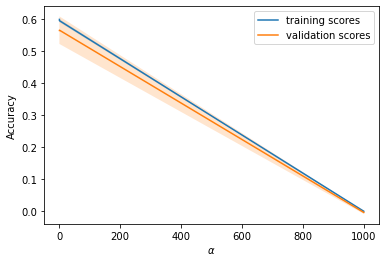

In [ ]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

plot_with_err(np.logspace(-7, 3, 3), val_train, label="training scores")
plot_with_err(np.logspace(-7, 3, 3), val_test, label="validation scores")
plt.xlabel(r"$\alpha$")
plt.ylabel("Accuracy")
plt.legend();

Basiclly, Lasso saves us from overfitting by regularizing the estimates towards zero, then the effect of the non- impactful features is reduced and it saves the model from high variance with more stable fit. And it  is done by modifying our typical loss function  by adding a penalty for higher magnitude coefficient values. Here we can see as the regularization paramater(alpha) increasing, the accuracy of the Lasso model is decresing and two trends(validation and training scores) are close to each other, which means that our model is underfitting.

Model Overfitting happens when the trainig score is high and the validation score is low, however, in our case, with the parameter alpha = 0.01 Lasso model gives adequate results i.e both trends have a normal score -> 0.5661778295170125


**Case - 2: Ridge Regression**

Ridge Regression has almost the same process of regularizing the weights, but the difference is the appliance of l2-norm adn the problem it resolves. In other words, while Lasso resolves the feature selection problem by assigning some coefficient(not relevent features) to zero, the ridge regression will shrink all of the coefficients towards zero, but it will not set any of them exactly to zero (unless alpha = ∞), and it solves the problem of multicollinearity.

In [ ]:
grid_linreg_l2 = GridSearchCV(Ridge(),param_grid = {'alpha': np.logspace(-7, 3, 3)}, cv=10)
grid_linreg_l2.fit(X, y)
grid_linreg_l2.best_params_, grid_linreg_l2.best_score_

({'alpha': 1000.0}, 0.5665559365436942)

In [ ]:
val_train, val_test = validation_curve(Ridge(), X, y,  param_name="alpha", param_range=np.logspace(-7, 3, 3) , cv = 10)

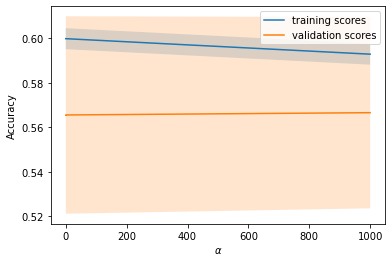

In [ ]:
plot_with_err(np.logspace(-7, 3, 3), val_train, label="training scores")
plot_with_err(np.logspace(-7, 3, 3), val_test, label="validation scores")
plt.xlabel(r"$\alpha$")
plt.ylabel("Accuracy")
plt.legend();

It can be said that, if alpha → ∞, the impact of shrinkage penalty increases and the ridge regression estimate coefficients will approach to zero. In the Ridge Regression, as aplha increases, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias.As we can see on the validation curve plot, the Ridge regression yields relatively normal accuracy of both trends with the alpha = 1000 and the accuracy result is 0.5665559365436942.So there is no problem with overfitting or underfitting.
 

### <center> GridSearchCV implementation with Logistic Regression.

Logistic regression is not able to learn what value of $C$ to choose. It can not be solve by the optimization problem. Hence, $C$ is the a model hyperparameter that is tuned on GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_logreg = GridSearchCV(logreg_model, param_grid ={'C': np.logspace(-5, 2, 6)} , return_train_score=True, cv=10, n_jobs=-1)

grid_logreg.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 2.51188643e-04, 6.30957344e-03, 1.58489319e-01,
       3.98107171e+00, 1.00000000e+02])},
             return_train_score=True)

In [ ]:
grid_logreg.best_params_, grid_logreg.best_score_

({'C': 0.00630957344480193}, 0.9710552451893234)

In [ ]:
val_train, val_test = validation_curve( logreg_model, X, y, "C", np.logspace(-5, 2, 6), cv=10, scoring="accuracy")

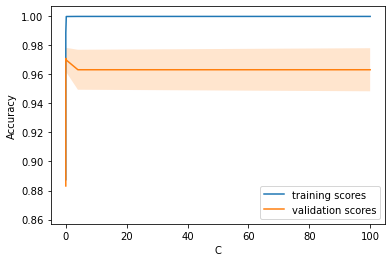

In [ ]:
plot_with_err(np.logspace(-5, 2, 6), val_train, label="training scores")
plot_with_err(np.logspace(-5, 2, 6), val_test, label="validation scores")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend();

$$\large J(X,y,w) = \mathcal{L} + \frac{1}{C}||w||^2,$$

where

- $\mathcal{L}$ is the logistic loss function 
- $C$ is the reverse regularization coefficient 

Here we can say that $C$ corresponds to Complexity of a model.

- if $C$ is small-> regularization is strong-> model will underfit. And on the validation curve graph we can see that indeed at smaller valuse of C, our model underfitting, because both trends has low accuracy and too close to each other.

- if $C$ is large-> regularization is weak -> model will overfit. And on the validation curve graph we can see that at higher valuse of C, our model is not overfitting because both trends show relatively good accuracy scores.

To conclude Logistic Regression has the best accuracy score(0.9710552451893234) by setting the hyperparameter $C$ = 0.00630957344480193.


